## Clean and Analyze Employee Exit Surveys

#### We'll work with exit surveys from employees of the Department of Education, 
#### Training and Employment (DETE), and the Technical and Further Education (TAFE) 
#### institute in Queensland, Australia. 
<br>
The data are available here from the government of Australia. <br>

https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey

#### The questions stakeholders want answers to are:

####  Are employees who only worked for the institutes for a short period of time resigning 
####  due to some kind of dissatisfaction? What about employees who have been there longer?

### Setup 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
filepath_dete = '/Users/Melat/Desktop/dete_surveyc.csv'
filepath_tafe = '/Users/Melat/Desktop/tafe_surveyc.csv'

dete_survey = pd.read_csv(filepath_dete)
tafe_survey = pd.read_csv(filepath_tafe)

### DETE

In [3]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.isnull().sum().sort_values(ascending = True)

ID                                       0
Workload                                 0
Work life balance                        0
Traumatic incident                       0
Ill Health                               0
Study/Travel                             0
Relocation                               0
Maternity/family                         0
Employment conditions                    0
Work location                            0
Lack of job security                     0
Lack of recognition                      0
Physical work environment                0
Dissatisfaction with the department      0
None of the above                        0
Interpersonal conflicts                  0
Job dissatisfaction                      0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Career move to public sector             0
Career move to private sector            0
Region     

Certain column names have to be renamed. 
Datatype conversion is not required among the columns we are interested in for our analysis. 
Several columns have null values. NESB, Disability, Aboriginal,
South Sea, Torres Strait, which are the last 5 columns have the most null values all exceeding 500. 
It is also evident that not all of the columns will be required for our analysis. 

In [5]:
list(dete_survey.columns)

['ID',
 'SeparationType',
 'Cease Date',
 'DETE Start Date',
 'Role Start Date',
 'Position',
 'Classification',
 'Region',
 'Business Unit',
 'Employment Status',
 'Career move to public sector',
 'Career move to private sector',
 'Interpersonal conflicts',
 'Job dissatisfaction',
 'Dissatisfaction with the department',
 'Physical work environment',
 'Lack of recognition',
 'Lack of job security',
 'Work location',
 'Employment conditions',
 'Maternity/family',
 'Relocation',
 'Study/Travel',
 'Ill Health',
 'Traumatic incident',
 'Work life balance',
 'Workload',
 'None of the above',
 'Professional Development',
 'Opportunities for promotion',
 'Staff morale',
 'Workplace issue',
 'Physical environment',
 'Worklife balance',
 'Stress and pressure support',
 'Performance of supervisor',
 'Peer support',
 'Initiative',
 'Skills',
 'Coach',
 'Career Aspirations',
 'Feedback',
 'Further PD',
 'Communication',
 'My say',
 'Information',
 'Kept informed',
 'Wellness programs',
 'Health & 

We will use data exploration methods on the columns that will help us achieve our goal.
Some of these columns are: <br>
SeparationType: The reason why the person's employment ended <br>
Cease Date: The year or month the person's employment ended <br>
DETE Start Date: The year the person began employment with the DETE <br>
Job dissatisfaction: Whether they are disatisfied with job <br>
Dissatisfaction with the department: Whether they are disatisfied with job

In [6]:
print(dete_survey['SeparationType'].value_counts(dropna = False))
print(dete_survey['Cease Date'].value_counts(dropna = False))
print(dete_survey['DETE Start Date'].value_counts(dropna = False))
print(dete_survey['Job dissatisfaction'].value_counts(dropna = False))
print(dete_survey['Dissatisfaction with the department'].value_counts(dropna = False))

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64
2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2013         2
08/2012         2
07/2014         2
04/2014         2
02/2014         2
09/2010         1
09/2014         1
2010            1
07/2006         1
2014            1
11/2012         1
07/2012         1
Name: Cease Date, dtype: int64
Not Stated    73
2011          40
2007          34
2008          31
2010          27
201

The dataframe contains 'Not Stated' values that indicate values are missing, 
but they aren't represented as NaN. Therefore, we must handle this issue. 

In [7]:
dete_survey = pd.read_csv(filepath_dete, na_values = 'Not Stated')

In [8]:
print(dete_survey['Cease Date'].value_counts(dropna= False))
print(dete_survey['DETE Start Date'].value_counts(dropna= False))

2012       344
2013       200
01/2014     43
12/2013     40
NaN         34
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2013      2
08/2012      2
07/2014      2
04/2014      2
02/2014      2
09/2010      1
09/2014      1
2010         1
07/2006      1
2014         1
11/2012      1
07/2012      1
Name: Cease Date, dtype: int64
NaN       73
2011.0    40
2007.0    34
2008.0    31
2010.0    27
2012.0    27
2009.0    24
2006.0    23
1970.0    21
1975.0    21
2013.0    21
2005.0    20
1990.0    20
1999.0    19
1996.0    19
1992.0    18
1991.0    18
2000.0    18
2004.0    18
1989.0    17
1978.0    15
2003.0    15
1988.0    15
1976.0    15
2002.0    15
1974.0    14
1997.0    14
1998.0    14
1979.0    14
1995.0    14
1980.0    14
1993.0    13
1972.0    12
1986.0    12
1977.0    11
1971.0    10
1984.0    10
1994.0    10
1969.0    10
2001.0    10
1983.0     9
1981.0     9
1973.0     8
1985.0     8
1987.0     7
1982.0   

### TAFE

In [9]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Not all the columns are required for our analysis. Of those that are required, certain columns must be renamed. 

In [10]:
tafe_survey['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         371
NaN                                       265
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [11]:
tafe_survey['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

-                      360
NaN                    265
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

These columns are indicative of job dissatisfaction, but further processing of the values 
is required before analysis i.e datatype conversion. 

In [12]:
tafe_survey.isnull().sum().sort_values(ascending = True)

Record ID                                                          0
Institute                                                          0
WorkArea                                                           0
Reason for ceasing employment                                      1
CESSATION YEAR                                                     7
                                                                ... 
Contributing Factors. Career Move - Public Sector                265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Ill Health                                 265
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Main Factor. Which of these was the main factor for leaving?     589
Length: 72, dtype: int64

Most of the 'conrtibuting factors' columns have null values exceeding 200. 
In both datasets, there are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Data Cleaning

### Drop unnecessary columns / Filter rows 

In [13]:
dete_survey.drop(dete_survey.columns[28:49], axis = 1, inplace = True)
tafe_survey.drop(tafe_survey.columns[17:66], axis = 1, inplace = True)

In [14]:
print(dete_survey['SeparationType'].value_counts())
tafe_survey['Reason for ceasing employment'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

We will remove more of the data we don't need. We'll only analyze survey respondents who resigned because our goal is to analyze resignations due to some kind of dissatisfaction.

In [15]:
dete_survey_updated = dete_survey[(dete_survey['SeparationType'] == 'Resignation-Other reasons')| 
            (dete_survey['SeparationType'] == 'Resignation-Other employer') | 
            (dete_survey['SeparationType'] == 'Resignation-Move overseas/interstate')].copy()

In [16]:
dete_survey_updated['SeparationType'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: SeparationType, dtype: int64

In [17]:
tafe_survey_updated = tafe_survey[tafe_survey['Reason for ceasing employment'] == 'Resignation'].copy()

In [18]:
tafe_survey_updated['Reason for ceasing employment'].value_counts()

Resignation    340
Name: Reason for ceasing employment, dtype: int64

The records are now only of employees who have resigned. This is what is needed for our analysis.

### Editing column names 

In [19]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(' ', '_')
dete_survey_updated.rename({'separationtype': 'separation_type'}, axis =1, inplace = True)
print(dete_survey_updated.columns)

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [20]:
column_names = {
'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separation_type',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}


tafe_survey_updated.rename(column_names, axis = 1, inplace = True)
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


### Verify the Data 

In [21]:
print(dete_survey_updated['cease_date'].value_counts().sort_index(ascending = True))
dete_survey_updated['dete_start_date'].value_counts().sort_index(ascending = True)

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
Name: cease_date, dtype: int64


1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [22]:
pattern = r"(?P<year>[0-9]{4})"
dete_survey_updated['cease_date'] = dete_survey_updated['cease_date'].str.extract(pattern).astype('float')
dete_survey_updated['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

We only need the year in the cease_date column for our analysis, so we have extracted it. 

In [23]:
tafe_survey_updated['cease_date'].value_counts().sort_index(ascending = True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

We have focused on verifying that the years in the cease_date and dete_start_date columns make sense. It is evident that the values are not unrealistically high or low. 
It is worth noting that the tafe_survey dataset has only 2 resignations in the year 2009. 
This might be indicative that data might not have been collected for the entire year. 

In [24]:
dete_survey_updated['institute_service'] = dete_survey_updated['cease_date'] - dete_survey_updated['dete_start_date']
dete_survey_updated['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

the tafe dataframe already contains a institute_service column which indicates the length of employement. In order to analyze both surveys together, we have createe a corresponding institute_service column in dete_resignations.

### Identify Dissatisfied Employees

In [25]:
dete_survey_updated['dissatisfied'] = dete_survey_updated[['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']].any(axis = 1, skipna=False)

In [26]:
dete_survey_updated[['dissatisfied', 'institute_service']].head()

,dissatisfied,institute_service
3,False,7.0
5,True,18.0
8,False,3.0
9,True,15.0
11,False,3.0


We have identified employees who resigned because they were dissatisfied.
The columns we have used to categorize employees as dissatisfied are isolated. 
For any of the columns that contained a True value, we have added a True value to a 
new column named dissatisfied.

In [27]:
tafe_survey_updated[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].head(15)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
8,-,-
9,-,-
10,-,-
13,-,-
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction


In [28]:
def conversion(val):
    if val == '-':
        return False 
    elif pd.isnull(val):
        return np.nan
    else:
        return True 

In [29]:
tafe_survey_updated[['Contributing Factors. Dissatisfaction', 
                     'Contributing Factors. Job Dissatisfaction']] = tafe_survey_updated[['Contributing Factors. Dissatisfaction', 
                     'Contributing Factors. Job Dissatisfaction']].applymap(conversion)

In [30]:
tafe_survey_updated[['Contributing Factors. Dissatisfaction', 
                     'Contributing Factors. Job Dissatisfaction']].head(15)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


In [31]:
tafe_survey_updated['dissatisfied'] = tafe_survey_updated[['Contributing Factors. Dissatisfaction', 
                     'Contributing Factors. Job Dissatisfaction']].any(axis = 1, skipna=False)

In [32]:
tafe_survey_updated[['dissatisfied', 'institute_service']].head()

,dissatisfied,institute_service
3,False,NaN
4,False,3-4
5,False,7-10
6,False,3-4
7,False,3-4


In [33]:
print(tafe_survey_updated['dissatisfied'].value_counts(dropna = False))
print(dete_survey_updated['dissatisfied'].value_counts(dropna = False))

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64
False    162
True     149
Name: dissatisfied, dtype: int64


For any of the columns in the tafe dataset that contained a True value indicating dissatiisfaction, we have added a True value to a new column named dissatisfied.

Create a copy of the cleaned dataframe:

In [34]:
tafe_resignations_up = tafe_survey_updated.copy()
dete_resignations_up = dete_survey_updated.copy()

### Combine the Data

In [35]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] =  'TAFE'

combined = pd.concat([tafe_resignations_up, dete_resignations_up], axis = 0, ignore_index=True)

We added a column to each dataframe that will allow us to easily distinguish between the two
institutes. Then we proceeded to combine the dataframes. 

In [36]:
combined_updated = combined.dropna(axis = 1, thresh = 500).copy()

In [37]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   cease_date         635 non-null    float64
 2   separation_type    651 non-null    object 
 3   gender             592 non-null    object 
 4   age                596 non-null    object 
 5   employment_status  597 non-null    object 
 6   position           598 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


We still had some columns left that we don't need to complete our analysis. 
We dropped any columns with less than 500 non null values.

In [38]:
combined_updated.head()

,id,cease_date,separation_type,gender,age,employment_status,position,institute_service,dissatisfied,institute
0,6.341399e+17,2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,False,TAFE
1,6.341466e+17,2010.0,Resignation,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,False,TAFE
2,6.341475e+17,2010.0,Resignation,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,False,TAFE
3,6.341520e+17,2010.0,Resignation,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,False,TAFE
4,6.341537e+17,2010.0,Resignation,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,False,TAFE


### Cleaning service column 

In [39]:
combined_updated['institute_service'].unique()

array([nan, '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years', 7.0, 18.0, 3.0, 15.0, 14.0, 5.0, 30.0, 32.0,
       39.0, 17.0, 9.0, 6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0,
       8.0, 2.0, 0.0, 23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0,
       22.0, 28.0, 49.0, 11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0],
      dtype=object)

In [40]:
pattern = r"(\d+)"
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(pattern).astype(float)
combined_updated['institute_service'].unique()

array([nan,  3.,  7.,  1., 11.,  5., 20., 18., 15., 14., 30., 32., 39.,
       17.,  9.,  6., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0.,
       23., 13., 16., 12., 21., 24., 33., 22., 28., 49., 41., 27., 42.,
       25., 29., 34., 31.])

We used vectorized string methods to extract the years of service.

### Categorizing length of service 

To analyze the data, we'll convert these institute service numbers into categories.
We will categorize the values in the institute_service column using the definitions below. <br> <br>
New: Less than 3 years at a company <br>
Experienced: 3-6 years at a company <br>
Established: 7-10 years at a company <br>
Veteran: 11 or more years at a company

In [41]:
def career_stages(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif (val >= 3) and (val <= 6):
        return 'Experienced'
    elif (val >= 7) and (val <= 10):
        return 'Established'
    else:
        return 'Veteran'

In [42]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stages)
print(combined_updated['service_cat'].unique())
print(combined_updated['service_cat'].value_counts(dropna = False))

[nan 'Experienced' 'Established' 'New' 'Veteran']
New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64


We have created a function that maps each year value to one of the career stages above.
We have applied the function on the institute service column. 

### Handling missing values 

In [45]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [47]:
combined_updated['dissatisfied'].fillna(False, inplace = True)
combined_updated['dissatisfied'].unique()

array([False,  True])

Replaced the missing values in the dissatisfied column with the value that 
occurs most frequently in this column, which was False. 

## Perform Analysis

In [52]:
pivot_table = pd.pivot_table(combined_updated, index = 'service_cat', values = 'dissatisfied')
pivot_table

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


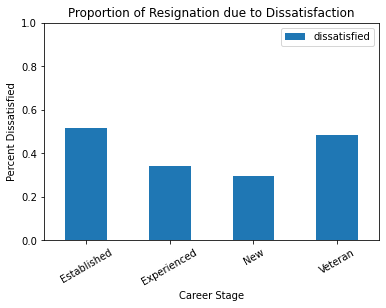

In [65]:
%matplotlib inline 
pivot_table.plot(kind = 'bar', rot= 30)
plt.ylim([0,1])
plt.xlabel('Career Stage')
plt.ylabel('Percent Dissatisfied')
plt.title('Proportion of Resignation due to Dissatisfaction')
plt.show()


Employees who have worked for the institutes for a short period of time are resigning due to some kind of job dissatisfaction at a far lower rate than those employees who have been there longer. <br>
Those that are new or have been with the institute for less than 3 years have resigned due to some kind of job dissatisfaction at the lowest rate. Where only around 29.5% of those who resigned have reported that it was due to some kind of job dissatisfaction. <br>
Esperienced employees have the second lowest rate of resignation due to some kind of job dissaatisfaction at around 34%. <br>
For those employees that have been there longer, the resignation due to job dissatisfaction rise significantly. Although there is not a significant difference in the numbers between veterans and established workers, established employees or those who have worked with the company between 7 years to 10 years have the highest resignation due to job dissatisfaction at 51.6%. Whereas 48.5% of veterans who resigned did so because they were dissatisfied at their job.